In [4]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("/Users/tarekmourad/Desktop/GunViolenceData/ds-councilor-worrell-gun-violence/spring23-team-4/data/fio-records-2022-mark43-fieldcontact-table.csv")
display(df)

df.dtypes

,fc_num,contact_date,contact_officer,contact_officer_name,supervisor,supervisor_name,street,city,state,zip,...,basis,vehicle_year,vehicle_state,vehicle_model,vehicle_color,vehicle_style,vehicle_type,key_situations,contact_reason,weather
0,FC22000008,2022-01-01 00:00:00,151206,"WATTY-NILES, CREFTON",11586,CHRISTOPHER CARROLL,ALBANY ST,BOSTON,MA,2118,...,Reasonable Suspicion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/01/2022 11:40 PM\n\nOfficers responded to a...,NaN
1,FC22000001,2022-01-01 02:30:00,153132,"VILLEGAS-HOAG, STEPHANIE",11212,MICHAEL MCCARTHY,NaN,BOSTON,MA,2122,...,Probable Cause,2008.0,MA,Taurus,Brown,"4 Door, Sedan",Passenger Car/ Automobile,NaN,"About 02:30am, Officers assisted State Police ...",NaN
2,FC22000004,2022-01-01 09:29:00,148290,"PARHAM, ANTHONY",10845,JAMES MOORE,BRIARCLIFF,MATTAPAN,MA,2126,...,Encounter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"About 10:00AM, Saturday 1/1/21 Officers respon...",NaN
3,FC22000003,2022-01-01 10:16:00,162319,"Uhrig, Robert",9266,STEVEN CICCOLO,E EIGHTH ST,SOUTH BOSTON,MA,2127,...,Reasonable Suspicion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"About 10:16am on Saturday, 01/01/22, Officers ...",NaN
4,FC22000005,2022-01-01 10:29:00,100417,"FLYNN, THOMAS",11212,MICHAEL MCCARTHY,ROBINSON ST,DORCHESTER,MA,2122,...,Probable Cause,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Officers responded to a radio call for a B&E t...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5273,FC22005691,2022-12-31 14:18:00,144446,"BANG, SEAN",51201,TIMOTHY COUGHLIN,MAVERICK STREET,BOSTON,MA,2128,...,Intel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel
5274,FC22005694,2022-12-31 15:00:00,153329,"KOVALESKI, STEVEN",10652,DONALD KEENAN,MASSACHUSETTS AVE,DORCHESTER,MA,2125,...,Reasonable Suspicion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reasonable Suspicion
5275,FC22005697,2022-12-31 18:01:00,164603,"MacLeod, Sean",102682,ERIC MERNER,DORCHESTER AVE,DORCHESTER,MA,2124,...,Probable Cause,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5276,FC23000049,2022-12-31 22:45:00,162308,"Tilley, Ryan",11478,JOHN BROWN,BRAGDON ST,ROXBURY,MA,2119,...,Encounter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


fc_num                   object
contact_date             object
contact_officer           int64
contact_officer_name     object
supervisor                int64
supervisor_name          object
street                   object
city                     object
state                    object
zip                       int64
stop_duration           float64
circumstance             object
basis                    object
vehicle_year            float64
vehicle_state            object
vehicle_model            object
vehicle_color            object
vehicle_style            object
vehicle_type             object
key_situations          float64
contact_reason           object
weather                  object
dtype: object

,street,city,zip,count
1289,nan,BOSTON,2118,226
1294,nan,BOSTON,2124,149
1290,nan,BOSTON,2119,135
1292,nan,BOSTON,2121,133
1317,nan,DORCHESTER,2124,132
1315,nan,DORCHESTER,2121,102
10,ALBANY ST,BOSTON,2118,94
1331,nan,ROXBURY,2119,78
1295,nan,BOSTON,2125,75
1288,nan,BOSTON,2116,69


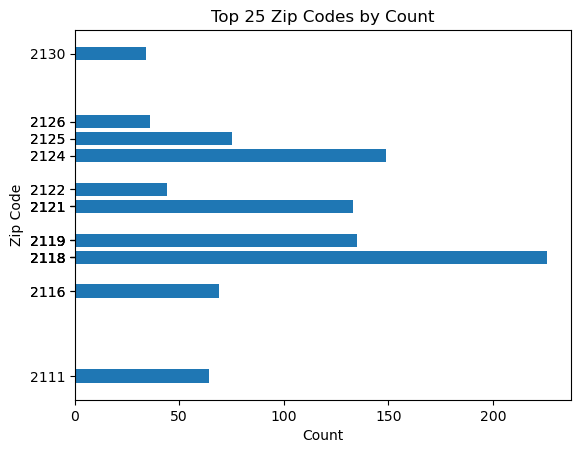

In [5]:
import numpy as np

# convert the "street" and "city" columns to string
df['street'] = df['street'].astype(str)
df['city'] = df['city'].astype(str)
# group by street, city, and zip, and aggregate by count
grouped_df = df.groupby(['street', 'city', 'zip']).agg({'zip': 'count'})


# rename the column to "count"
grouped_df.rename(columns={'zip': 'count'}, inplace=True)

# reset the index to make the grouped columns regular columns
grouped_df.reset_index(inplace=True)

# sort the grouped_df by count in descending order
grouped_df = grouped_df.sort_values(by='count', ascending=False)

display(grouped_df.head(25))

# get the top 25 zip codes by count
top_25_zipcodes = grouped_df.sort_values(by='count', ascending=False).head(25)

# filter out empty zip codes
top_25_zipcodes = top_25_zipcodes[top_25_zipcodes['zip'].notnull()]

# create a horizontal bar chart
plt.barh(top_25_zipcodes['zip'], top_25_zipcodes['count'])

# set the x-axis label
plt.xlabel('Count')

# set the y-axis label
plt.ylabel('Zip Code')

# set the title
plt.title('Top 25 Zip Codes by Count')

# set y-ticks to exact zip codes
plt.yticks(top_25_zipcodes['zip'])

# show the plot
plt.show()






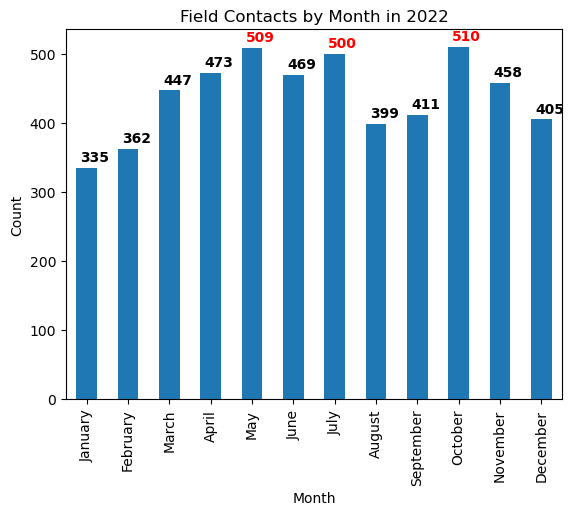

In [7]:
import calendar


#Read the Field Contract data for each year from 2015 to 2022
df_2015 = pd.read_csv("/Users/tarekmourad/Desktop/GunViolenceData/ds-councilor-worrell-gun-violence/spring23-team-4/data/fieldcontactforpublic2015.csv")
df_2016 = pd.read_csv("//Users/tarekmourad/Desktop/GunViolenceData/ds-councilor-worrell-gun-violence/spring23-team-4/data/fieldcontactforpublic2016.csv")
df_2017 = pd.read_csv("/Users/tarekmourad/Desktop/GunViolenceData/ds-councilor-worrell-gun-violence/spring23-team-4/data/rms_fieldcontacts_for_public_2017_202003111424.csv")
df_2018 = pd.read_csv("/Users/tarekmourad/Desktop/GunViolenceData/ds-councilor-worrell-gun-violence/spring23-team-4/data/rms_fieldcontacts_for_public_2018_202003111433.csv")
df_2019_2 = pd.read_csv("/Users/tarekmourad/Desktop/GunViolenceData/ds-councilor-worrell-gun-violence/spring23-team-4/data/mark43_fieldcontacts_for_public_20192.csv")
df_2019_1 = pd.read_csv("/Users/tarekmourad/Desktop/GunViolenceData/ds-councilor-worrell-gun-violence/spring23-team-4/data/rms_fieldcontacts_for_public_2019.csv")
df_2020 = pd.read_csv("/Users/tarekmourad/Desktop/GunViolenceData/ds-councilor-worrell-gun-violence/spring23-team-4/data/mark43_fieldcontacts_for_public_2020_202104151551.csv")
df_2021 = pd.read_csv("/Users/tarekmourad/Desktop/GunViolenceData/ds-councilor-worrell-gun-violence/spring23-team-4/data/fio_2021-2.csv")
df_2022 = pd.read_csv("/Users/tarekmourad/Desktop/GunViolenceData/ds-councilor-worrell-gun-violence/spring23-team-4/data/fio-records-2022-mark43-fieldcontact-table.csv")

#2022 2022 2022 2022 2022 2022 2022 2022

df_2022["contact_date"] = df["contact_date"].astype(str)

df_2022["month"] = pd.to_datetime(df_2022["contact_date"]).dt.month

monthly_counts = df_2022[df_2022["contact_date"].str.startswith("2022")].groupby("month").count()["contact_date"]

df_2022["month"] = pd.to_datetime(df_2022["contact_date"]).dt.month

monthly_counts = df_2022[df_2022["contact_date"].str.startswith("2022")].groupby("month").count()["contact_date"]

# Create a list of month names
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Replace the month numbers with the month names
monthly_counts.index = month_names

# Get the top 3 months by count
top_months = monthly_counts.sort_values(ascending=False).head(3).index

ax = monthly_counts.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Field Contacts by Month in 2022")

# Add text labels above each bar
for i, v in enumerate(monthly_counts):
    color = 'black' if monthly_counts.index[i] not in top_months else 'red'
    ax.text(i - 0.15, v + 10, str(v), color=color, fontweight='bold')

plt.show()

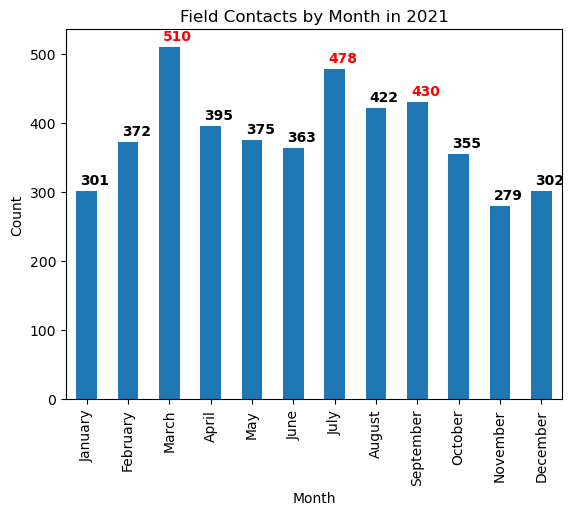

In [8]:
#2021 2021 2021 2021 2021 2021 2021 2021

df_2021 = pd.read_csv("/Users/tarekmourad/Desktop/GunViolenceData/ds-councilor-worrell-gun-violence/spring23-team-4/data/fio_2021-2.csv")

df_2021["month"] = pd.to_datetime(df_2021["contact_date"]).dt.month

monthly_counts = df_2021[df_2021["contact_date"].str.startswith("2021")].groupby("month").count()["contact_date"]

# Create a list of month names
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Replace the month numbers with the month names
monthly_counts.index = month_names

# Get the top 3 months by count
top_months = monthly_counts.sort_values(ascending=False).head(3).index

ax = monthly_counts.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Field Contacts by Month in 2021")

# Add text labels above each bar
for i, v in enumerate(monthly_counts):
    color = 'black' if monthly_counts.index[i] not in top_months else 'red'
    ax.text(i - 0.15, v + 10, str(v), color=color, fontweight='bold')

plt.show()

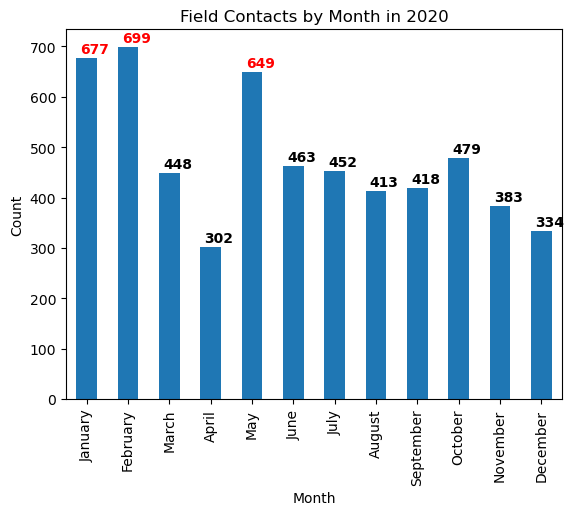

In [9]:
#2020 2020 2020 2020 2020 2020

df_2020["month"] = pd.to_datetime(df_2020["contact_date"]).dt.month

monthly_counts = df_2020[df_2020["contact_date"].str.startswith("2020")].groupby("month").count()["contact_date"]

# Create a list of month names
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Replace the month numbers with the month names
monthly_counts.index = month_names

# Get the top 3 months by count
top_months = monthly_counts.sort_values(ascending=False).head(3).index

ax = monthly_counts.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Field Contacts by Month in 2020")

# Add text labels above each bar
for i, v in enumerate(monthly_counts):
    color = 'black' if monthly_counts.index[i] not in top_months else 'red'
    ax.text(i - 0.15, v + 10, str(v), color=color, fontweight='bold')

plt.show()

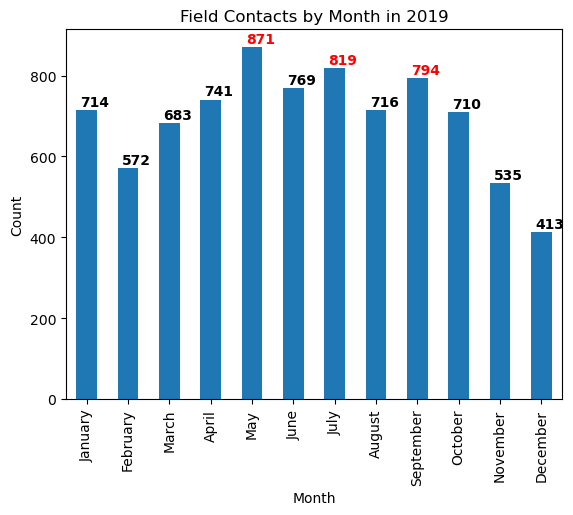

In [10]:
#2019 2019 2019 2019 2019 2019 2019 2019

df_2019 = pd.concat([df_2019_1, df_2019_2])

df_2019["month"] = pd.to_datetime(df_2019["contact_date"]).dt.month

monthly_counts = df_2019[df_2019["contact_date"].str.startswith("2019")].groupby("month").count()["contact_date"]

# Create a list of month names
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Replace the month numbers with the month names
monthly_counts.index = month_names

# Get the top 3 months by count
top_months = monthly_counts.sort_values(ascending=False).head(3).index

ax = monthly_counts.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Field Contacts by Month in 2019")

# Add text labels above each bar
for i, v in enumerate(monthly_counts):
    color = 'black' if monthly_counts.index[i] not in top_months else 'red'
    ax.text(i - 0.15, v + 10, str(v), color=color, fontweight='bold')

plt.show()

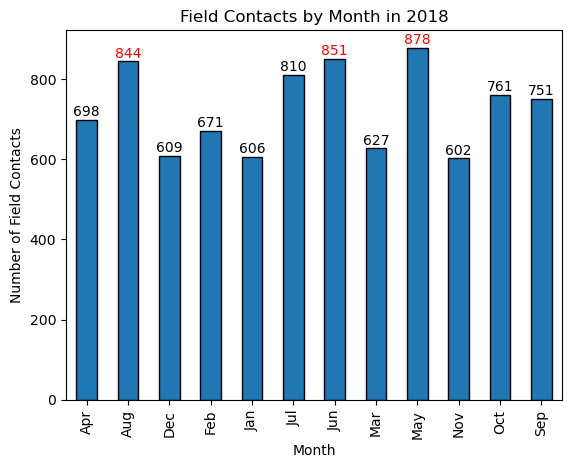

In [11]:
# Convert contact_date column to datetime
df_2018['contact_date'] = pd.to_datetime(df_2018['contact_date'], format='%m/%d/%Y %H:%M')

# Group the data by month and count the number of field contacts
monthly_counts = df_2018.groupby(df_2018['contact_date'].dt.strftime('%b'))['contact_date'].count()

# Get the top 3 months
top_3 = monthly_counts.nlargest(3)

# Create a bar chart
ax = monthly_counts.plot(kind='bar', color='C0', edgecolor='black')

# Add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Number of Field Contacts')
ax.set_title('Field Contacts by Month in 2018')

# Add the count above each bar
for i, v in enumerate(monthly_counts):
    if v in top_3.values:
        ax.text(i, v+10, str(v), ha='center', color='red')
    else:
        ax.text(i, v+10, str(v), ha='center')

# Show the plot
plt.show()